# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,Partition,Algorithm,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,MRR
0,5,Custom,0.618,2.121,0.921526,0.940988,0.949947,0.028879
1,5,PersMean,0.640,2.794,0.921526,0.940988,0.949947,0.029351
2,4,Custom,0.051,0.763,0.934511,0.974935,0.947616,0.030180
3,4,PersMean,0.041,1.357,0.934511,0.974935,0.947616,0.029949
4,3,PersMean,0.049,1.422,0.904862,0.924322,0.951801,0.032978


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [4]:
agg_results = results.drop(['Partition'], axis=1).groupby('Algorithm').mean()
agg_results

,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,MRR
Algorithm,,,,,,
Custom,0.1518,1.0968,0.920736,0.941336,0.949690,0.030060
ItemItem,7.2840,16.4518,0.884148,0.898177,0.955747,0.107109
PersMean,0.1772,1.6278,0.920736,0.941336,0.949690,0.030271


## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

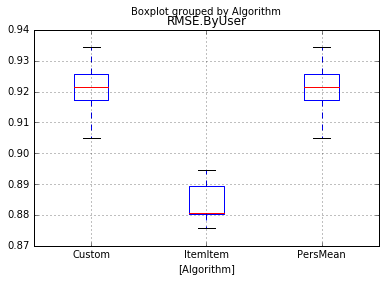

In [5]:
results.loc[:,['Algorithm', 'RMSE.ByUser']].boxplot(by='Algorithm')

Next up: nDCG

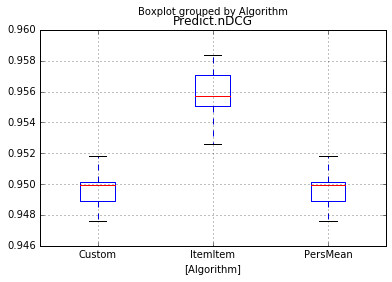

In [6]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm')

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000169B5759518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000169B5CF7B70>], dtype=object)

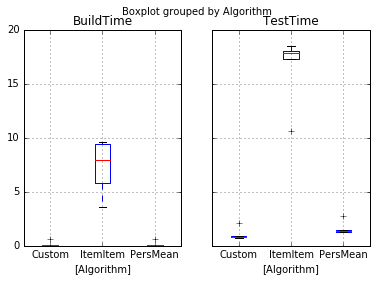

In [7]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm')